## **REVIEW OF SRI LANKAN TOURISM INDUSTRY IN YEAR 2021**
Reference : https://sltda.gov.lk/en/tourism-industry-report

**Analyzing tourist arrivals from main tourist source markets**

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 12.3 MB/s 
     |████████████████████████████████| 6.3 MB 41.4 MB/s 
     |████████████████████████████████| 16.7 MB 31.1 MB/s 


In [ ]:
import pandas as pd
from google.colab import files
import io
import geopandas
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving DetailsByCountryCSV.csv to DetailsByCountryCSV.csv


In [ ]:
df = pd.read_csv('DetailsByCountryCSV.csv',index_col=0)
df

,Number of tourists,Latitude,Longitude
Country of Residence,,,
India,56268,20.593684,78.962880
United Kingdom,16646,55.378051,-3.435973
China,2417,35.861660,104.195397
Germany,12442,51.165691,10.451526
Australia,4421,-25.274398,133.775136
...,...,...,...
Afghanistan,15,33.939110,67.709953
Bhutan,5,27.514162,90.433601
Nigeria,11,9.081999,8.675277


In [ ]:
df.isnull().sum()

Number of tourists    0
Latitude              1
Longitude             1
dtype: int64

In [ ]:
df = df.dropna()
df

,Number of tourists,Latitude,Longitude
Country of Residence,,,
India,56268,20.593684,78.962880
United Kingdom,16646,55.378051,-3.435973
China,2417,35.861660,104.195397
Germany,12442,51.165691,10.451526
Australia,4421,-25.274398,133.775136
...,...,...,...
Sudan,97,12.862807,30.217636
Afghanistan,15,33.939110,67.709953
Bhutan,5,27.514162,90.433601


In [ ]:
geo_df = geopandas.GeoDataFrame(df, geometry = geopandas.points_from_xy(df.Longitude, df.Latitude))
geo_df

,Number of tourists,Latitude,Longitude,geometry
Country of Residence,,,,
India,56268,20.593684,78.962880,POINT (78.96288 20.59368)
United Kingdom,16646,55.378051,-3.435973,POINT (-3.43597 55.37805)
China,2417,35.861660,104.195397,POINT (104.19540 35.86166)
Germany,12442,51.165691,10.451526,POINT (10.45153 51.16569)
Australia,4421,-25.274398,133.775136,POINT (133.77514 -25.27440)
...,...,...,...,...
Sudan,97,12.862807,30.217636,POINT (30.21764 12.86281)
Afghanistan,15,33.939110,67.709953,POINT (67.70995 33.93911)
Bhutan,5,27.514162,90.433601,POINT (90.43360 27.51416)


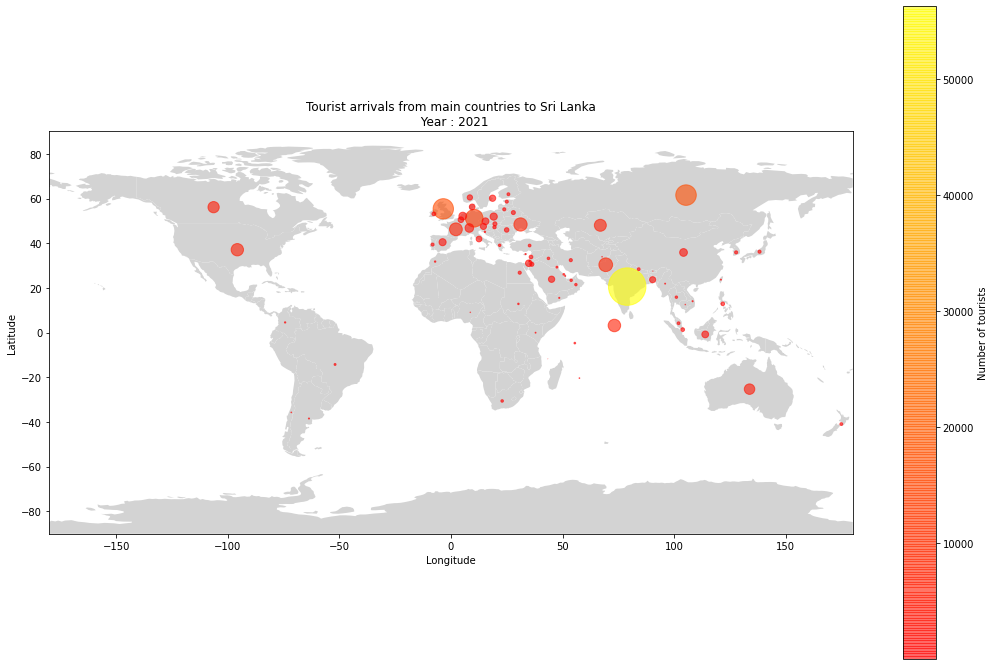

In [ ]:
# Getting world map data from geo pandas
worldmap = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(18, 12))
worldmap.plot(color="lightgrey", ax=ax)

# Plotting tourist source markets with a color map
x = geo_df['Longitude']
y = geo_df['Latitude']
z = geo_df['Number of tourists']
plt.scatter(x, y, 
              s=0.025*z,
              c=z,
              alpha=0.6,             
              cmap='autumn'
            )
plt.colorbar(label='Number of tourists')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.title("Tourist arrivals from main countries to Sri Lanka\n  Year : 2021")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## **Grade A restaurants and Grade B restaurants distribution in Sri Lanka**

**Import Data_SL.csv dataset** (Provinces dataset)

In [ ]:
data_to_load = files.upload()

Saving Data_SL.csv to Data_SL.csv


In [ ]:
df_sl = pd.read_csv(io.BytesIO(data_to_load['Data_SL.csv']), index_col=0)

In [ ]:
df_sl['Province'] = df_sl['Province'].str.strip()
df_sl['Province'] = df_sl['Province'].str.lower()

In [ ]:
df_sl = df_sl.sort_values('Province')

In [ ]:
df_sl

,Province,area,population,province_capital,geometry
4,central,5584.0,2571557,Kandy,MULTIPOLYGON (((80.59737495572138 6.7613410650...
3,eastern,9951.0,1555510,Trincomali,MULTIPOLYGON (((81.84051220462177 6.8651526262...
8,north central,10724.0,1266663,Anuradhapura,MULTIPOLYGON (((81.24110036845308 7.7132734944...
7,north western,7812.0,2380861,Puttalam,MULTIPOLYGON (((80.28812276183488 7.3148721443...
0,northern,8882.0,1061315,Jaffna,MULTIPOLYGON (((80.16225334755487 9.4557407563...
2,sabaragamuwa,4902.0,1928655,Ratnapura,MULTIPOLYGON (((80.92171262248037 6.2391493249...
5,southern,5559.0,2477285,Galle,MULTIPOLYGON (((80.58723940363515 5.9194880646...
1,uva,8488.0,1266463,Badulla,MULTIPOLYGON (((80.97969740883408 6.3268994747...
6,western,3709.0,5850745,Colombo,MULTIPOLYGON (((80.29707976135295 6.3504039792...


In [ ]:
df_sl['geometry'] = geopandas.GeoSeries.from_wkt(df_sl['geometry'])
geo_df=geopandas.GeoDataFrame(df_sl,crs="EPSG:4326")
geo_df

,Province,area,population,province_capital,geometry
4,central,5584.0,2571557,Kandy,"MULTIPOLYGON (((80.59737 6.76134, 80.58889 6.7..."
3,eastern,9951.0,1555510,Trincomali,"MULTIPOLYGON (((81.84051 6.86515, 81.83533 6.8..."
8,north central,10724.0,1266663,Anuradhapura,"MULTIPOLYGON (((81.24110 7.71327, 81.24063 7.7..."
7,north western,7812.0,2380861,Puttalam,"MULTIPOLYGON (((80.28812 7.31487, 80.28317 7.3..."
0,northern,8882.0,1061315,Jaffna,"MULTIPOLYGON (((80.16225 9.45574, 80.16367 9.4..."
2,sabaragamuwa,4902.0,1928655,Ratnapura,"MULTIPOLYGON (((80.92171 6.23915, 80.92030 6.2..."
5,southern,5559.0,2477285,Galle,"MULTIPOLYGON (((80.58724 5.91949, 80.58748 5.9..."
1,uva,8488.0,1266463,Badulla,"MULTIPOLYGON (((80.97970 6.32690, 80.97404 6.3..."
6,western,3709.0,5850745,Colombo,"MULTIPOLYGON (((80.29708 6.35040, 80.29897 6.3..."


**Import lk.csv dataset** (Restaurants dataset)

In [ ]:
data_to_load = files.upload()

Saving lk.csv to lk.csv


In [ ]:
df_restaurants = pd.read_csv(io.BytesIO(data_to_load['lk.csv']), usecols= ['City','Restaurants(Grade_A)','Restaurants(Grade_B)','Province', 'Latitude', 'Longitude'])

**Preprocessed dataset**

In [ ]:
df_restaurants['Province'] = df_restaurants['Province'].str.strip()
df_restaurants['Province'] = df_restaurants['Province'].str.lower()
df_restaurants = df_restaurants.sort_values('Province')

In [ ]:
df_resA = df_restaurants.groupby(['Province'])['Restaurants(Grade_A)'].sum().reset_index()
df_resA

,Province,Restaurants(Grade_A)
0,central,27
1,eastern,0
2,north central,3
3,north western,10
4,northern,12
5,sabaragamuwa,15
6,southern,34
7,uva,5
8,western,300


In [ ]:
df_resB = df_restaurants.groupby(['Province'])['Restaurants(Grade_B)'].sum().reset_index()
df_resB

,Province,Restaurants(Grade_B)
0,central,11
1,eastern,1
2,north central,2
3,north western,6
4,northern,4
5,sabaragamuwa,4
6,southern,14
7,uva,4
8,western,59


In [ ]:
df_restaurants

,City,Restaurants(Grade_A),Restaurants(Grade_B),Latitude,Longitude,Province
19,Nuwara Eliya,3,2,6.9497,80.7891,central
16,Matale,7,4,7.4667,80.6167,central
10,Kandy,17,5,7.2970,80.6385,central
1,Ampara,0,0,7.3018,81.6747,eastern
3,Batticaloa,0,1,7.7170,81.7000,eastern
0,Anuradhapura,2,2,8.3350,80.4108,north central
20,Polonnaruwa,1,0,7.9403,81.0188,north central
21,Puttalam,1,3,8.0330,79.8260,north western
13,Kurunegala,9,3,7.4833,80.3667,north western
18,Mullaittivu,1,2,9.2833,80.8000,northern


**Finalized dataset**

In [ ]:
merged_Frame = pd.merge(geo_df, df_resA, on = 'Province', how='inner')
merged_Frame = pd.merge(merged_Frame, df_resB, on = 'Province', how='inner') 
merged_Frame

,Province,area,population,province_capital,geometry,Restaurants(Grade_A),Restaurants(Grade_B)
0,central,5584.0,2571557,Kandy,"MULTIPOLYGON (((80.59737 6.76134, 80.58889 6.7...",27,11
1,eastern,9951.0,1555510,Trincomali,"MULTIPOLYGON (((81.84051 6.86515, 81.83533 6.8...",0,1
2,north central,10724.0,1266663,Anuradhapura,"MULTIPOLYGON (((81.24110 7.71327, 81.24063 7.7...",3,2
3,north western,7812.0,2380861,Puttalam,"MULTIPOLYGON (((80.28812 7.31487, 80.28317 7.3...",10,6
4,northern,8882.0,1061315,Jaffna,"MULTIPOLYGON (((80.16225 9.45574, 80.16367 9.4...",12,4
5,sabaragamuwa,4902.0,1928655,Ratnapura,"MULTIPOLYGON (((80.92171 6.23915, 80.92030 6.2...",15,4
6,southern,5559.0,2477285,Galle,"MULTIPOLYGON (((80.58724 5.91949, 80.58748 5.9...",34,14
7,uva,8488.0,1266463,Badulla,"MULTIPOLYGON (((80.97970 6.32690, 80.97404 6.3...",5,4
8,western,3709.0,5850745,Colombo,"MULTIPOLYGON (((80.29708 6.35040, 80.29897 6.3...",300,59


**Plot A grade restaurants**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


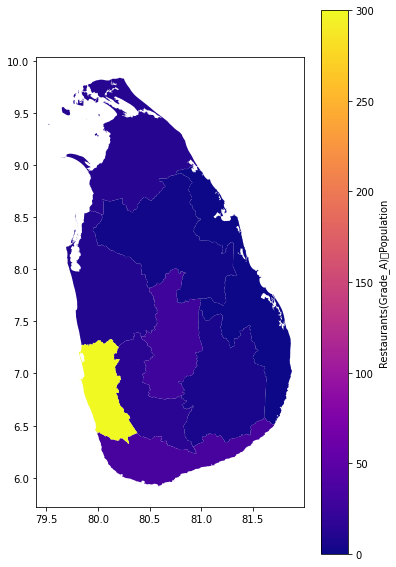

In [ ]:
fig, ax = plt.subplots(figsize=(6, 10))
merged_Frame.plot(column= 'Restaurants(Grade_A)', 
           ax=ax,
           legend = True,
            cmap ='plasma',
           legend_kwds={'label':"Restaurants(Grade_A)	Population",
                        'orientation':"vertical"})

**Plot B grade restaurants**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


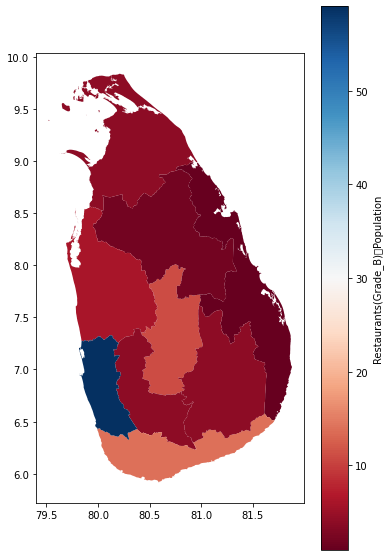

In [ ]:
fig, ax = plt.subplots(figsize=(6, 10))
merged_Frame.plot(column= 'Restaurants(Grade_B)', 
           ax=ax,
           legend = True,
           cmap ='RdBu',
           legend_kwds={'label':"Restaurants(Grade_B)	Population",
                        'orientation':"vertical"})

## **Rooms distribution in Sri Lanka**

**Import data_rooms.csv dataset**

In [ ]:
data_to_load = files.upload()

Saving data_rooms.csv to data_rooms.csv


In [ ]:
df_rooms = pd.read_csv(io.BytesIO(data_to_load['data_rooms.csv']), usecols= ['District','Number_of_rooms','Presentage_share','Province','Latitude','Longitude'])

In [ ]:
df_rooms['Province'] = df_rooms['Province'].str.strip()
df_rooms['Province'] = df_rooms['Province'].str.lower()
df_rooms = df_rooms.sort_values('Province')

In [ ]:
#Group by number of rooms according to province
df_rooms_sum = df_rooms.groupby(['Province'])['Number_of_rooms'].sum().reset_index()
df_rooms_sum

,Province,Number_of_rooms
0,central,7991
1,eastern,2432
2,north central,2302
3,north western,1834
4,northern,777
5,sabaragamuwa,1037
6,southern,12094
7,uva,2381
8,western,16489


In [ ]:
#Group by Percentage share of provincial distribution of rooms according to province
df_rooms_presentage = df_rooms.groupby(['Province'])['Presentage_share'].sum().reset_index()
df_rooms_presentage

,Province,Presentage_share
0,central,16.87
1,eastern,5.13
2,north central,4.86
3,north western,3.87
4,northern,1.62
5,sabaragamuwa,2.18
6,southern,25.54
7,uva,5.02
8,western,34.82


In [ ]:
df_rooms

,District,Number_of_rooms,Presentage_share,Latitude,Longitude,Province
19,Nuwara Eliya,2127,4.49,6.9497,80.7891,central
16,Matale,2166,4.57,7.4667,80.6167,central
10,Kandy,3698,7.81,7.2970,80.6385,central
24,Trincomalee,740,1.56,8.5667,81.2333,eastern
1,Ampara,778,1.64,7.3018,81.6747,eastern
3,Batticaloa,914,1.93,7.7170,81.7000,eastern
20,Polonnaruwa,683,1.44,7.9403,81.0188,north central
0,Anuradhapura,1619,3.42,8.3350,80.4108,north central
21,Puttalam,1355,2.86,8.0330,79.8260,north western
13,Kurunegala,479,1.01,7.4833,80.3667,north western


In [ ]:
#Merge df_rooms table to the merged_Frame 
merged_Frame = pd.merge(merged_Frame, df_rooms_sum, on = 'Province', how='inner')
merged_Frame = pd.merge(merged_Frame, df_rooms_presentage, on = 'Province', how='inner') 

merged_Frame

,Province,area,population,province_capital,geometry,Restaurants(Grade_A),Restaurants(Grade_B),Number_of_rooms,Presentage_share
0,central,5584.0,2571557,Kandy,"MULTIPOLYGON (((80.59737 6.76134, 80.58889 6.7...",27,11,7991,16.87
1,eastern,9951.0,1555510,Trincomali,"MULTIPOLYGON (((81.84051 6.86515, 81.83533 6.8...",0,1,2432,5.13
2,north central,10724.0,1266663,Anuradhapura,"MULTIPOLYGON (((81.24110 7.71327, 81.24063 7.7...",3,2,2302,4.86
3,north western,7812.0,2380861,Puttalam,"MULTIPOLYGON (((80.28812 7.31487, 80.28317 7.3...",10,6,1834,3.87
4,northern,8882.0,1061315,Jaffna,"MULTIPOLYGON (((80.16225 9.45574, 80.16367 9.4...",12,4,777,1.62
5,sabaragamuwa,4902.0,1928655,Ratnapura,"MULTIPOLYGON (((80.92171 6.23915, 80.92030 6.2...",15,4,1037,2.18
6,southern,5559.0,2477285,Galle,"MULTIPOLYGON (((80.58724 5.91949, 80.58748 5.9...",34,14,12094,25.54
7,uva,8488.0,1266463,Badulla,"MULTIPOLYGON (((80.97970 6.32690, 80.97404 6.3...",5,4,2381,5.02
8,western,3709.0,5850745,Colombo,"MULTIPOLYGON (((80.29708 6.35040, 80.29897 6.3...",300,59,16489,34.82


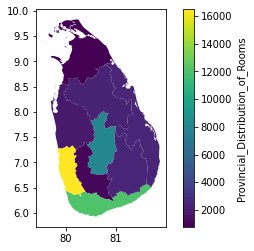

In [ ]:
#Getting Geographical distribution of rooms of SLTDA registered accommadation establishment 
fig, ax = plt.subplots(1,1)
merged_Frame.plot(column= 'Number_of_rooms', 
           ax=ax,
           legend = True,
           legend_kwds={'label':"Provincial_Distribution_of_Rooms",
                        'orientation':"vertical"})

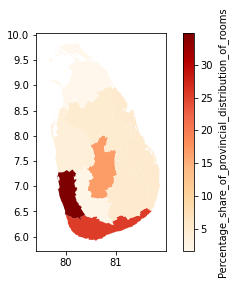

In [ ]:
#Getting Percentage share of provincial distribution of rooms
fig, ax = plt.subplots(1,1)
merged_Frame.plot(column= 'Presentage_share', 
           ax=ax,
           legend = True,
           cmap ='OrRd',
           legend_kwds={'label':"Percentage_share_of_provincial_distribution_of_rooms",
                        'orientation':"vertical"})

# **Distribution of Tourism Projects and Number of Rooms by Province**

**Import Data_Tourism.csv dataset**

In [ ]:
data_load = files.upload()

Saving Data_Tourism.csv to Data_Tourism (3).csv


In [ ]:
df_projects = pd.read_csv(io.BytesIO(data_load['Data_Tourism.csv']), usecols= ['City','Number_Of_Projects','Rooms','Province', 'Latitude', 'Longitude'])
df_projects

,City,Number_Of_Projects,Rooms,Latitude,Longitude,Province
0,Anuradhapura,5,143,8.3350,80.4108,North Central
1,Ampara,12,144,7.3018,81.6747,Eastern
2,Badulla,12,304,6.9847,81.0564,Uva
3,Batticaloa,19,490,7.7170,81.7000,Eastern
4,Colombo,52,6339,6.9167,79.8333,Western
5,Galle,86,3552,6.0395,80.2194,Southern
6,Gampaha,29,1644,7.0840,80.0098,Western
7,Hambantota,37,1840,6.1429,81.1212,Southern
8,Jaffna,11,336,9.6647,80.0167,Northern
9,Kalutara,30,1691,6.5854,79.9607,Western


**Sort the data according to Province**

In [ ]:
df_projects['Province'] = df_projects['Province'].str.strip()
df_projects['Province'] = df_projects['Province'].str.lower()
df_projects = df_projects.sort_values('Province')
df_projects 

,City,Number_Of_Projects,Rooms,Latitude,Longitude,Province
19,Nuwara Eliya,13,753,6.9497,80.7891,central
16,Matale,25,882,7.4667,80.6167,central
10,Kandy,21,219,7.2970,80.6385,central
12,Kilinochchi,2,36,9.4004,80.3999,eastern
1,Ampara,12,144,7.3018,81.6747,eastern
3,Batticaloa,19,490,7.7170,81.7000,eastern
20,Polonnaruwa,2,54,7.9403,81.0188,north central
0,Anuradhapura,5,143,8.3350,80.4108,north central
21,Puttalam,17,725,8.0330,79.8260,north western
13,Kurunegala,2,27,7.4833,80.3667,north western


**Get the summation of projects for each province**

In [ ]:
df_Project_Amount = df_projects.groupby(['Province'])['Number_Of_Projects'].sum().reset_index()
df_Project_Amount

,Province,Number_Of_Projects
0,central,59
1,eastern,33
2,north central,7
3,north western,19
4,northern,14
5,sabaragamuwa,3
6,southern,165
7,uva,14
8,western,111


**Get the summation of rooms for each province**

In [ ]:
df_Rooms_Amount = df_projects.groupby(['Province'])['Rooms'].sum().reset_index()
df_Rooms_Amount

,Province,Rooms
0,central,1854
1,eastern,670
2,north central,197
3,north western,752
4,northern,403
5,sabaragamuwa,70
6,southern,6634
7,uva,346
8,western,9674


**Merge three tables**

In [ ]:
#Merge df_rooms table to the geo_df 
merged_Frame = pd.merge(merged_Frame, df_Project_Amount, on = 'Province', how='inner')
merged_Frame = pd.merge(merged_Frame, df_Rooms_Amount, on = 'Province', how='inner') 

merged_Frame

,Province,area,population,province_capital,geometry,Restaurants(Grade_A),Restaurants(Grade_B),Number_of_rooms,Presentage_share,Number_Of_Projects,Rooms
0,central,5584.0,2571557,Kandy,"MULTIPOLYGON (((80.59737 6.76134, 80.58889 6.7...",27,11,7991,16.87,59,1854
1,eastern,9951.0,1555510,Trincomali,"MULTIPOLYGON (((81.84051 6.86515, 81.83533 6.8...",0,1,2432,5.13,33,670
2,north central,10724.0,1266663,Anuradhapura,"MULTIPOLYGON (((81.24110 7.71327, 81.24063 7.7...",3,2,2302,4.86,7,197
3,north western,7812.0,2380861,Puttalam,"MULTIPOLYGON (((80.28812 7.31487, 80.28317 7.3...",10,6,1834,3.87,19,752
4,northern,8882.0,1061315,Jaffna,"MULTIPOLYGON (((80.16225 9.45574, 80.16367 9.4...",12,4,777,1.62,14,403
5,sabaragamuwa,4902.0,1928655,Ratnapura,"MULTIPOLYGON (((80.92171 6.23915, 80.92030 6.2...",15,4,1037,2.18,3,70
6,southern,5559.0,2477285,Galle,"MULTIPOLYGON (((80.58724 5.91949, 80.58748 5.9...",34,14,12094,25.54,165,6634
7,uva,8488.0,1266463,Badulla,"MULTIPOLYGON (((80.97970 6.32690, 80.97404 6.3...",5,4,2381,5.02,14,346
8,western,3709.0,5850745,Colombo,"MULTIPOLYGON (((80.29708 6.35040, 80.29897 6.3...",300,59,16489,34.82,111,9674


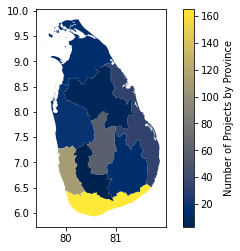

In [ ]:
fig, ax = plt.subplots(1, 1)
merged_Frame.plot(column='Number_Of_Projects', legend=True, ax=ax, cmap='cividis',legend_kwds={'label': "Number of Projects by Province"})

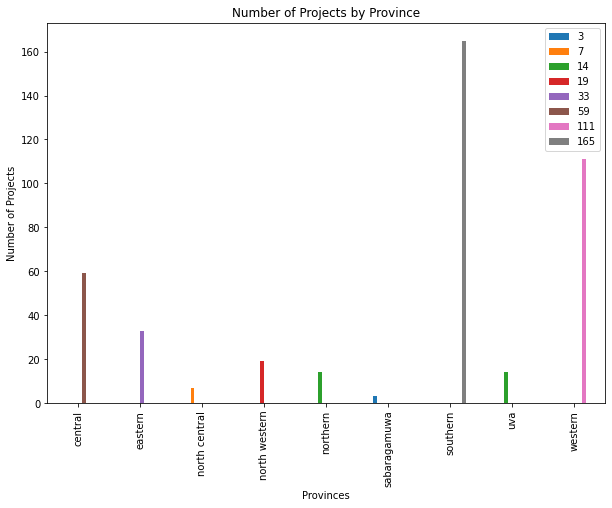

In [ ]:
merged_Frame.pivot(index='Province',columns='Number_Of_Projects',values="Number_Of_Projects").plot(kind='bar',figsize=(10,7))

plt.xlabel('Provinces')
plt.ylabel('Number of Projects')
plt.title('Number of Projects by Province')
plt.legend(loc='upper right')
plt.show()

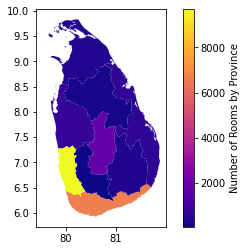

In [ ]:
fig, ax = plt.subplots(1, 1)
merged_Frame.plot(column='Rooms', legend=True, ax=ax, cmap='plasma',legend_kwds={'label': "Number of Rooms by Province"})

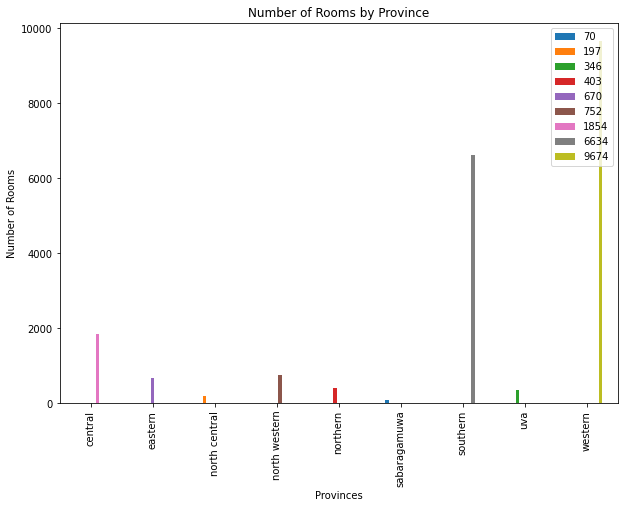

In [ ]:
merged_Frame.pivot(index='Province',columns='Rooms',values="Rooms").plot(kind='bar',figsize=(10,7))

plt.xlabel('Provinces')
plt.ylabel('Number of Rooms')
plt.title('Number of Rooms by Province')
plt.legend(loc='upper right')
plt.show()

# Distribution of Classified Hotels 


In [ ]:
data_to_load = files.upload()

Saving Province_Wise_Distribution_of_Classified_Hotels.csv to Province_Wise_Distribution_of_Classified_Hotels (6).csv


In [ ]:
df_classifiedHotels = pd.read_csv('Province_Wise_Distribution_of_Classified_Hotels2.csv')
df_classifiedHotels

,Province,Five Star Hotels,Four Star Hotels,Three Star Hotels,Two Star Hotels,One Star Hotels
0,Central,6,9,7,7,6
1,Eastern,1,2,1,2,0
2,North Central,1,2,2,4,3
3,North Western,0,1,1,4,1
4,Northern,0,0,2,1,1
5,Sabaragamuwa,0,1,0,1,2
6,Southern,7,5,3,11,5
7,Uva,0,1,0,0,1
8,Western,12,6,9,11,20


In [ ]:
df_classifiedHotels['Province'] = df_classifiedHotels['Province'].str.strip()
df_classifiedHotels['Province'] = df_classifiedHotels['Province'].str.lower()
df_classifiedHotels = df_classifiedHotels.sort_values('Province')

In [ ]:
merged_Frame = pd.merge(merged_Frame, df_classifiedHotels, on = 'Province', how='inner')
merged_Frame

,Province,area,population,province_capital,geometry,Restaurants(Grade_A),Restaurants(Grade_B),Number_of_rooms,Presentage_share,Number_Of_Projects,Rooms,Five Star Hotels,Four Star Hotels,Three Star Hotels,Two Star Hotels,One Star Hotels
0,central,5584.0,2571557,Kandy,"MULTIPOLYGON (((80.59737 6.76134, 80.58889 6.7...",27,11,7991,16.87,59,1854,6,9,7,7,6
1,eastern,9951.0,1555510,Trincomali,"MULTIPOLYGON (((81.84051 6.86515, 81.83533 6.8...",0,1,2432,5.13,33,670,1,2,1,2,0
2,north central,10724.0,1266663,Anuradhapura,"MULTIPOLYGON (((81.24110 7.71327, 81.24063 7.7...",3,2,2302,4.86,7,197,1,2,2,4,3
3,north western,7812.0,2380861,Puttalam,"MULTIPOLYGON (((80.28812 7.31487, 80.28317 7.3...",10,6,1834,3.87,19,752,0,1,1,4,1
4,northern,8882.0,1061315,Jaffna,"MULTIPOLYGON (((80.16225 9.45574, 80.16367 9.4...",12,4,777,1.62,14,403,0,0,2,1,1
5,sabaragamuwa,4902.0,1928655,Ratnapura,"MULTIPOLYGON (((80.92171 6.23915, 80.92030 6.2...",15,4,1037,2.18,3,70,0,1,0,1,2
6,southern,5559.0,2477285,Galle,"MULTIPOLYGON (((80.58724 5.91949, 80.58748 5.9...",34,14,12094,25.54,165,6634,7,5,3,11,5
7,uva,8488.0,1266463,Badulla,"MULTIPOLYGON (((80.97970 6.32690, 80.97404 6.3...",5,4,2381,5.02,14,346,0,1,0,0,1
8,western,3709.0,5850745,Colombo,"MULTIPOLYGON (((80.29708 6.35040, 80.29897 6.3...",300,59,16489,34.82,111,9674,12,6,9,11,20


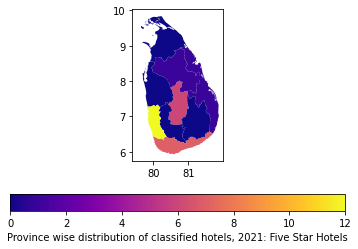

In [ ]:
merged_Frame.plot(column='Five Star Hotels', legend=True, cmap='plasma', legend_kwds={'label': "Province wise distribution of classified hotels, 2021: Five Star Hotels",'orientation':"horizontal"})
plt.show()

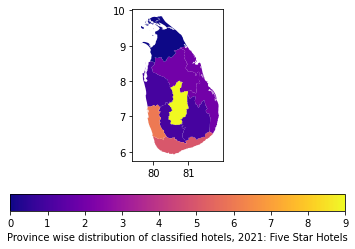

In [ ]:
merged_Frame.plot(column='Four Star Hotels', legend=True, cmap='plasma', legend_kwds={'label': "Province wise distribution of classified hotels, 2021: Five Star Hotels",
                        'orientation':"horizontal"})
plt.show()

In [ ]:
column_names = ['Five Star Hotels', 'Four Star Hotels', 'Three Star Hotels', 'Two Star Hotels', 'One Star Hotels']
merged_Frame['Total_Classified_Hotels']= merged_Frame[column_names].sum(axis=1)
merged_Frame

,Province,area,population,province_capital,geometry,Restaurants(Grade_A),Restaurants(Grade_B),Number_of_rooms,Presentage_share,Number_Of_Projects,Rooms,Five Star Hotels,Four Star Hotels,Three Star Hotels,Two Star Hotels,One Star Hotels,Total_Classified_Hotels
0,central,5584.0,2571557,Kandy,"MULTIPOLYGON (((80.59737 6.76134, 80.58889 6.7...",27,11,7991,16.87,59,1854,6,9,7,7,6,35
1,eastern,9951.0,1555510,Trincomali,"MULTIPOLYGON (((81.84051 6.86515, 81.83533 6.8...",0,1,2432,5.13,33,670,1,2,1,2,0,6
2,north central,10724.0,1266663,Anuradhapura,"MULTIPOLYGON (((81.24110 7.71327, 81.24063 7.7...",3,2,2302,4.86,7,197,1,2,2,4,3,12
3,north western,7812.0,2380861,Puttalam,"MULTIPOLYGON (((80.28812 7.31487, 80.28317 7.3...",10,6,1834,3.87,19,752,0,1,1,4,1,7
4,northern,8882.0,1061315,Jaffna,"MULTIPOLYGON (((80.16225 9.45574, 80.16367 9.4...",12,4,777,1.62,14,403,0,0,2,1,1,4
5,sabaragamuwa,4902.0,1928655,Ratnapura,"MULTIPOLYGON (((80.92171 6.23915, 80.92030 6.2...",15,4,1037,2.18,3,70,0,1,0,1,2,4
6,southern,5559.0,2477285,Galle,"MULTIPOLYGON (((80.58724 5.91949, 80.58748 5.9...",34,14,12094,25.54,165,6634,7,5,3,11,5,31
7,uva,8488.0,1266463,Badulla,"MULTIPOLYGON (((80.97970 6.32690, 80.97404 6.3...",5,4,2381,5.02,14,346,0,1,0,0,1,2
8,western,3709.0,5850745,Colombo,"MULTIPOLYGON (((80.29708 6.35040, 80.29897 6.3...",300,59,16489,34.82,111,9674,12,6,9,11,20,58


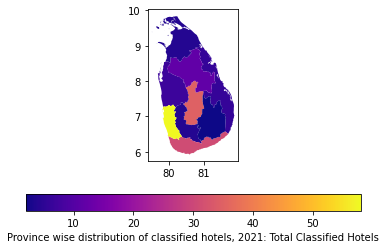

In [ ]:
merged_Frame.plot(column='Total_Classified_Hotels', legend=True, cmap='plasma', legend_kwds={'label': "Province wise distribution of classified hotels, 2021: Total Classified Hotels",
                        'orientation':"horizontal"})
plt.show()